In [63]:
import pandas as pd
#Part 1: Data Cleaning
# 1. Load the dataset into Python using pandas. 
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
# 2. Perform the data cleaning steps, examples include 
# • Handle missing values (e.g., drop, fill, or impute values appropriately). 
df.drop(columns=['DOORING_I', 'WORKERS_PRESENT_I','WORK_ZONE_TYPE','WORK_ZONE_I','STATEMENTS_TAKEN_I','PHOTOS_TAKEN_I'],inplace=True)
df.fillna('UNKNOWN', inplace=True)
# • Remove duplicate records if any exist. 
df[df.duplicated(subset=['CRASH_RECORD_ID'], keep=False)]
# • Standardize column names if necessary.
# • Convert date/time columns into appropriate formats.
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year

# Step 3: Calculate value counts for 'CRASH_YEAR'
crash_year_counts = df['CRASH_YEAR'].value_counts()
crash_year = df.pop('CRASH_YEAR')
df.insert(df.columns.get_loc('CRASH_MONTH') + 1, 'CRASH_YEAR', crash_year)
df['CRASH_DATE'] = df['CRASH_DATE'].dt.strftime('%m/%d/%Y %I:%M %p')
df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['DATE_POLICE_NOTIFIED'] = df['DATE_POLICE_NOTIFIED'].dt.strftime('%m/%d/%Y %I:%M %p')

day_of_week_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['CRASH_DAY_OF_WEEK'] = df['CRASH_DAY_OF_WEEK'].map(day_of_week_mapping)
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['CRASH_MONTH'] = df['CRASH_MONTH'].map(month_mapping)
df['CRASH_HOUR'] = pd.to_datetime(df['CRASH_HOUR'], format='%H').dt.strftime('%I %p')
# • Handle inconsistent data entries (e.g., standardizing categorical values like street 
# names or weather conditions). 
weather_mapping = {
    'CLEAR': 'CLEAR',
    'RAIN': 'RAIN',
    'UNKNOWN': 'UNKNOWN',
    'SNOW': 'SNOW',
    'CLOUDY/OVERCAST': 'CLOUDY',
    'OTHER': 'OTHER',
    'FREEZING RAIN/DRIZZLE': 'FREEZING RAIN',
    'FOG/SMOKE/HAZE': 'FOG',
    'SLEET/HAIL': 'SLEET',
    'BLOWING SNOW': 'BLOWING SNOW',
    'SEVERE CROSS WIND GATE': 'SEVERE CROSS WIND',
    'BLOWING SAND, SOIL, DIRT': 'BLOWING DUST'
}
df['WEATHER_CONDITION'] = df['WEATHER_CONDITION'].replace(weather_mapping)
# • Identify and address outliers where applicable. 

# Function to get value_counts for all columns
def get_value_counts_all_columns(df):
    value_counts_dict = {}
    for col in df.columns:
        value_counts_dict[col] = df[col].value_counts()
    return value_counts_dict

# Get value_counts for all columns
value_counts_all_columns = get_value_counts_all_columns(df)

# Display the value_counts for each column
for col, value_counts in value_counts_all_columns.items():
    print(f"Value counts for {col}:\n{value_counts}\n")

    
#save traffic data csv to cleaned chicago csv
df.to_csv('clean_chicago_traffic.csv', index=False)


C:\Users\asd\AppData\Local\Temp\ipykernel_6216\2081163391.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'UNKNOWN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('UNKNOWN', inplace=True)


Value counts for CRASH_RECORD_ID:
CRASH_RECORD_ID
bfa8377168b8dc75b4a09bf627b4e28fc77f465911c99b4a1c8e22ad3c414dcf4d229ecbc84d761cbc15d5f62ae91ab63100eb69e9cac27100b048ee95bf1044    1
00a530520c84927490b597a6220ff3f2a3347472ef3086ef96b91ee2d70fdbae5cbd9eddad123c5ce1517b97c0740b0962926515bbbf0c6b06b30ef5f5578054    1
027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a3862ecd4b6a511b82ceba4c683f2dc98c75b7389365d27132ec1973498a39e417693d70f5d352cdede33f    1
204c3ca48ff3cdf0737e7f10b54ef5f8c49fbe30b5e53e53f11755039efb71f965386bae115439bdf7458b55ed9243e8ed673a46843038ef32b79a4a95ba7de6    1
0173d218723a1d608d77b7142ca9b9a4afd7463e82416295e97796186e6794d1764e0ae3babd4381742ddbcfc0de6723bb9f5c104bc67f7361effb0a51037f4e    1
                                                                                                                                   ..
04716502690d17e32815b04a038533b93e20290adf790faab48da2a84bd61765fc819df0f4f07a863297456b826fb70c38623936d2cc6880994a69035e9dac20    1
03638af46c40

In [7]:
# Part 2: Exploratory Data Analysis (EDA) and Visualization 
# Load the cleaned dataset in your Jupyter Notebook. 
import pandas as pd
df = pd.read_csv('clean_chicago_traffic.csv')
# 1. Conduct an open-ended exploratory data analysis by selecting relevant columns and 
# identifying meaningful relationships. 
# Time related Columns
# -CRASH_DATE
# -CRASH_YEAR
# -CRASH_MONTH
# -CRASH_DAY_OF_WEEK
# -CRASH_HOUR
# Location Related Columns
# -INTERSECTION
# -STREET NAME
# WEATHER AND ENVIRONMENT
# -WEATHER_CONDITION
# -LIGHTING_CONDITION
# -ROAD_SURFACE_CONDITION
# CRASH CHARACTERISTICS
# -CRASH_TYPE
# -CRASH_SEVERITY
# -VEHICLES_INVOLVED
# HUMAN FACTORS
# -DRIVER_ACTION
# -DRIVER_CONDITION


C:\Users\asd\AppData\Local\Temp\ipykernel_6216\910124336.py:4: DtypeWarning: Columns (26,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_chicago_traffic.csv')


In [64]:
# 2. Create at least twenty (20) different visualizations that help interpret trends, patterns, 
# or relationships in the dataset. Examples include, 
# • Number of accidents per month/year.  
# • Correlation between weather conditions and collision count. 
# • Distribution of accidents based on time of the day. 
# • Impact of road conditions on traffic collisions. 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

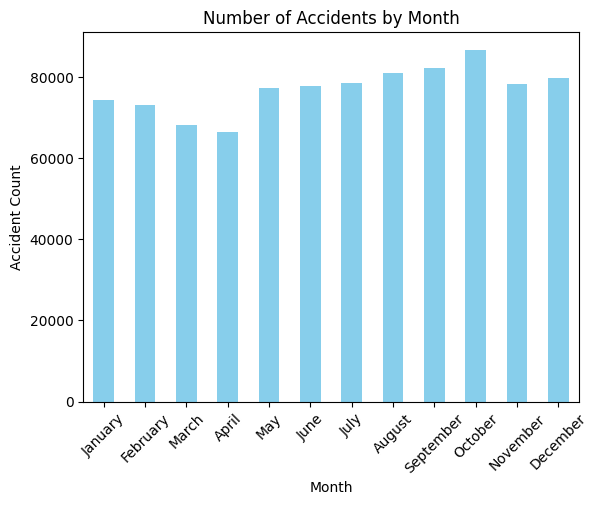

In [65]:

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
# Convert 'CRASH_MONTH' to a categorical type with the defined order
df['CRASH_MONTH'] = pd.Categorical(df['CRASH_MONTH'], categories=month_order, ordered=True)

# Plot the data with the correct month order
df['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()


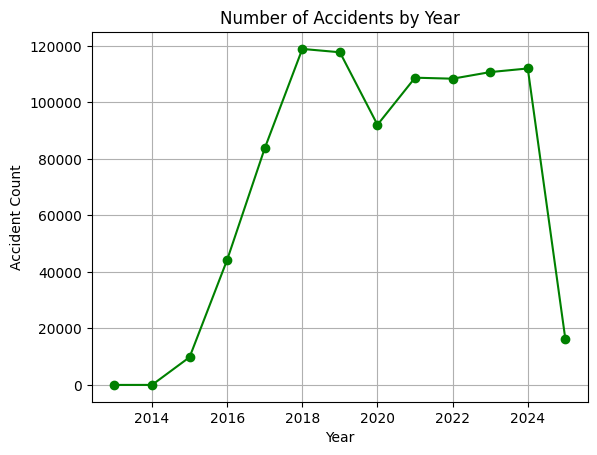

In [14]:
# Line chart to observe trends over years
crash_year_counts = df['CRASH_YEAR'].value_counts().sort_index()
crash_year_counts.plot(kind='line', marker='o', color='green')
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()


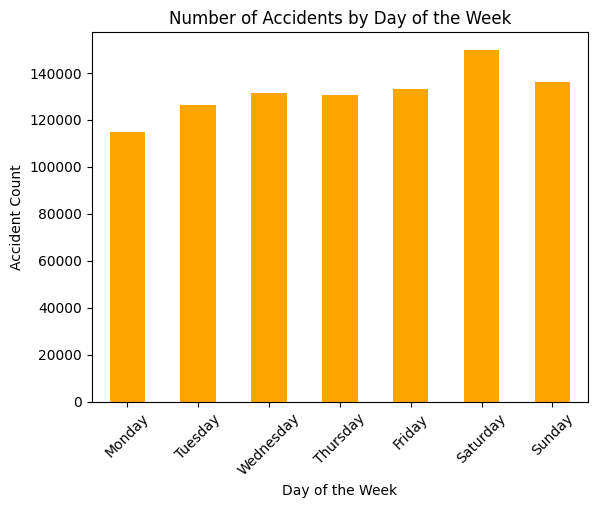

In [15]:
# Bar chart to explore accidents based on the day of the week
df['CRASH_DAY_OF_WEEK'] = pd.Categorical(df['CRASH_DAY_OF_WEEK'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

df['CRASH_DAY_OF_WEEK'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

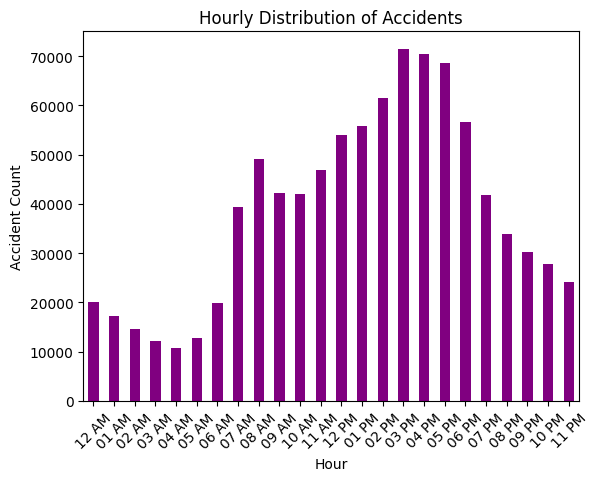

In [16]:

# Define the correct order for hours (12-hour format)
hour_order = [
    '12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', 
    '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', 
    '07 PM', '08 PM', '09 PM', '10 PM', '11 PM'
]

# Convert CRASH_HOUR to a categorical type with the defined order
df['CRASH_HOUR'] = pd.Categorical(df['CRASH_HOUR'], categories=hour_order, ordered=True)

# Plot the histogram showing the distribution of accidents by hour
df['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Hourly Distribution of Accidents')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()


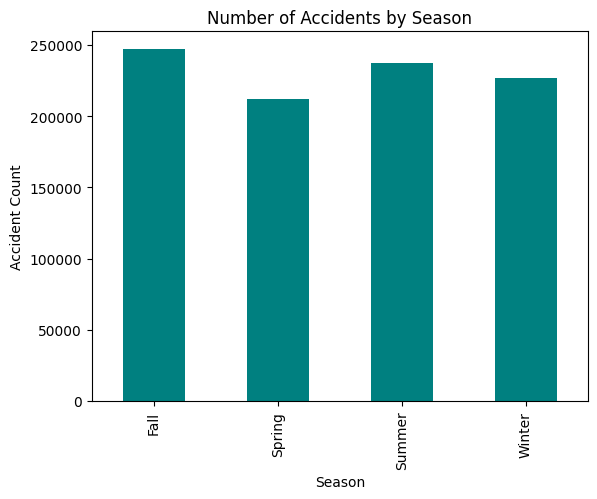

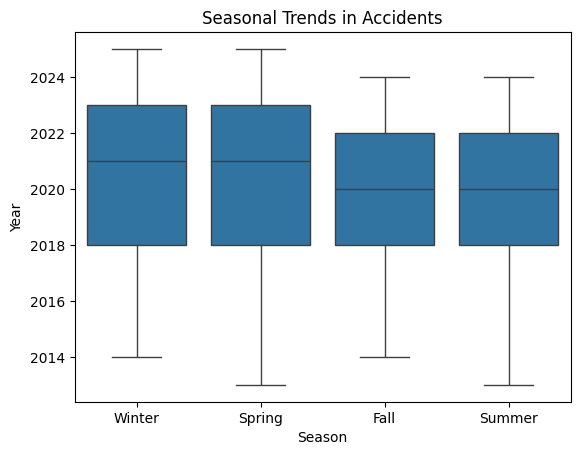

In [17]:
# Combine months into seasons
season_mapping = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring',
    'May': 'Spring', 'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}
df['season'] = df['CRASH_MONTH'].map(season_mapping)

# Bar chart for seasonal trends
df['season'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Number of Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Accident Count')
plt.show()

# Boxplot for accident counts by season (optional)
sns.boxplot(x='season', y='CRASH_YEAR', data=df)
plt.title('Seasonal Trends in Accidents')
plt.xlabel('Season')
plt.ylabel('Year')
plt.show()


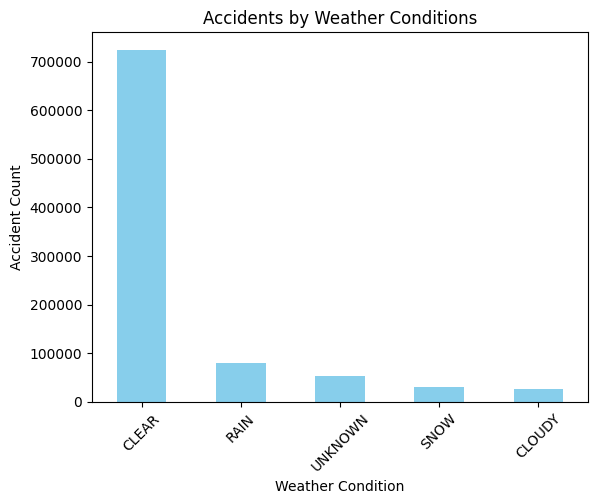

In [59]:
df['WEATHER_CONDITION'].value_counts().head(5).plot(kind='bar', color='skyblue')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

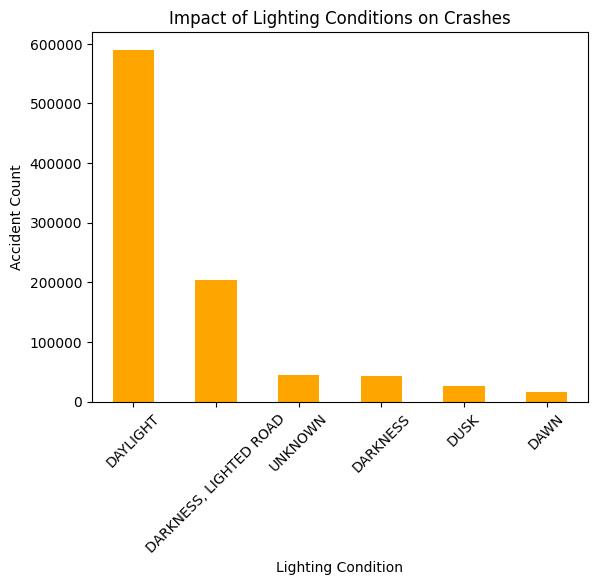

In [19]:
# Bar chart: Accidents by Lighting Condition
df['LIGHTING_CONDITION'].value_counts().plot(kind='bar', color='orange')
plt.title('Impact of Lighting Conditions on Crashes')
plt.xlabel('Lighting Condition')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

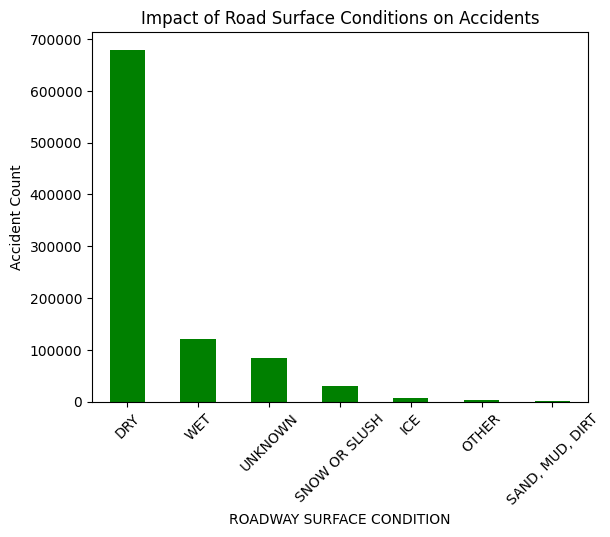

In [20]:
# Bar chart: Accidents by Road Surface Condition
df['ROADWAY_SURFACE_COND'].value_counts().plot(kind='bar', color='green')
plt.title('Impact of Road Surface Conditions on Accidents')
plt.xlabel('ROADWAY SURFACE CONDITION')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

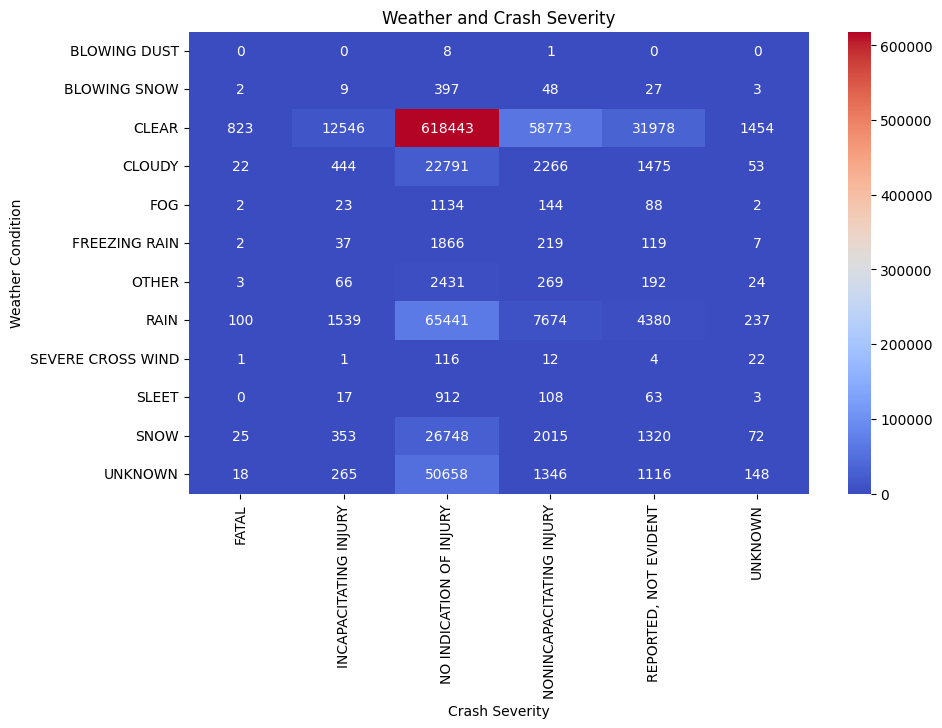

In [21]:
# Create a pivot table for weather vs. crash severity
weather_severity = df.pivot_table(index='WEATHER_CONDITION', columns='MOST_SEVERE_INJURY', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weather_severity, annot=True, fmt='d', cmap='coolwarm')
plt.title('Weather and Crash Severity')
plt.xlabel('Crash Severity')
plt.ylabel('Weather Condition')
plt.show()

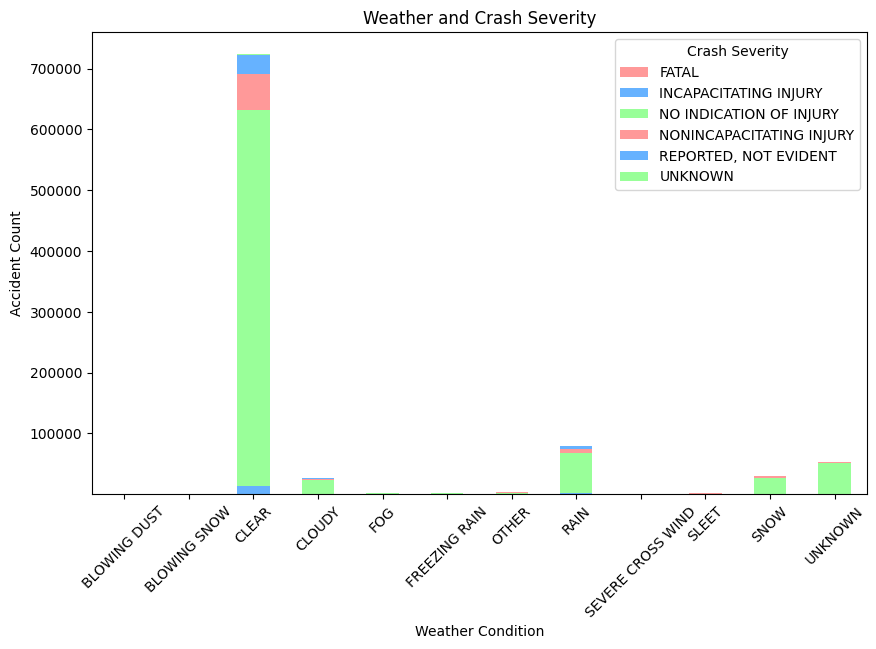

In [56]:
# Prepare data for a stacked bar chart
weather_severity = df.groupby(['WEATHER_CONDITION', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)

# Plot stacked bar chart
weather_severity.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Weather and Crash Severity')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.legend(title='Crash Severity')
plt.show()

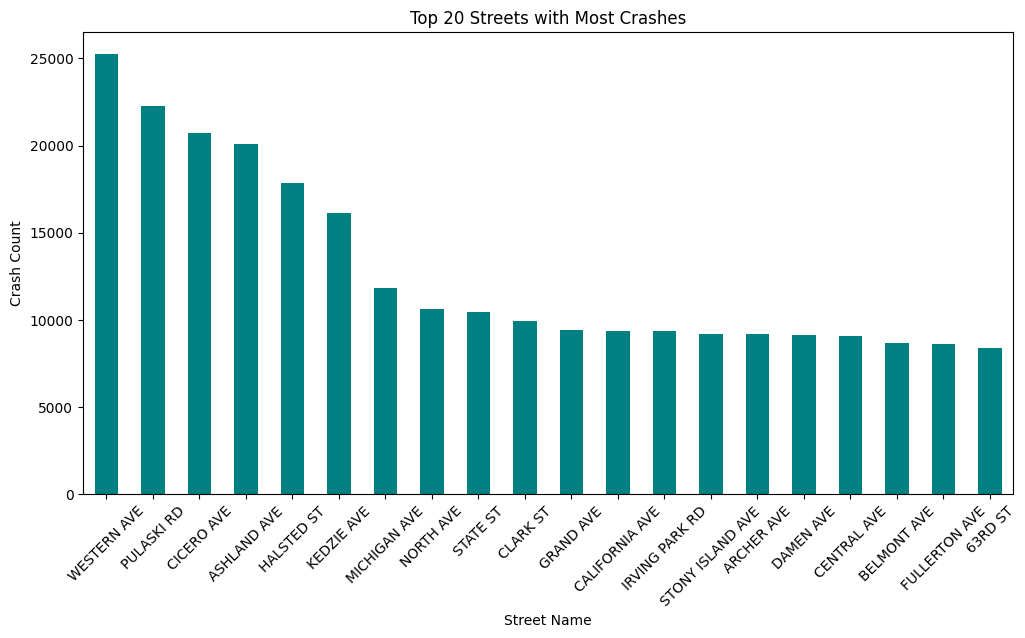

In [23]:


# Filter the top 20 most frequent streets (adjust the number as needed)
top_streets = df['STREET_NAME'].value_counts().head(20)

# Plot a bar chart for the top streets
top_streets.plot(kind='bar', color='teal', figsize=(12, 6))
plt.title('Top 20 Streets with Most Crashes')
plt.xlabel('Street Name')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()

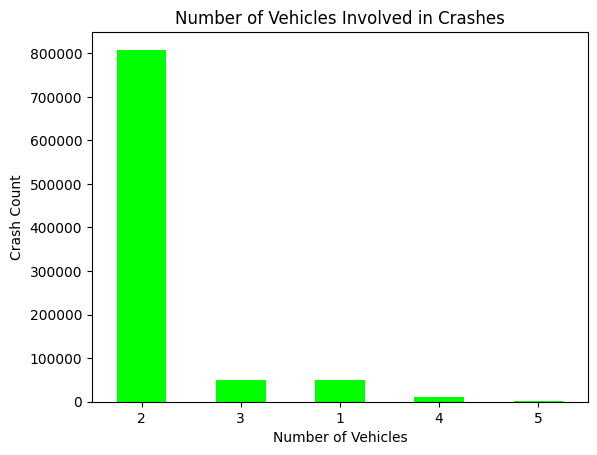

In [54]:
# Bar chart: Single vs. multiple vehicle crashes
df['NUM_UNITS'].value_counts().head(5).plot(kind='bar', color='lime')
plt.title('Number of Vehicles Involved in Crashes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Crash Count')
plt.xticks(rotation=0)
plt.show()


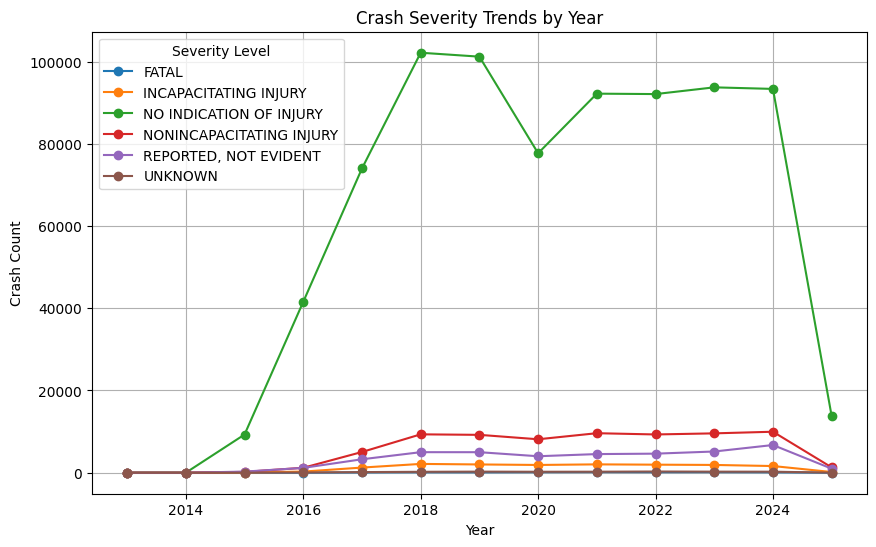

In [25]:
# Line chart: Yearly crash severity trends
severity_trends = df.groupby(['CRASH_YEAR', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)
severity_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Crash Severity Trends by Year')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.legend(title='Severity Level')
plt.grid()
plt.show()


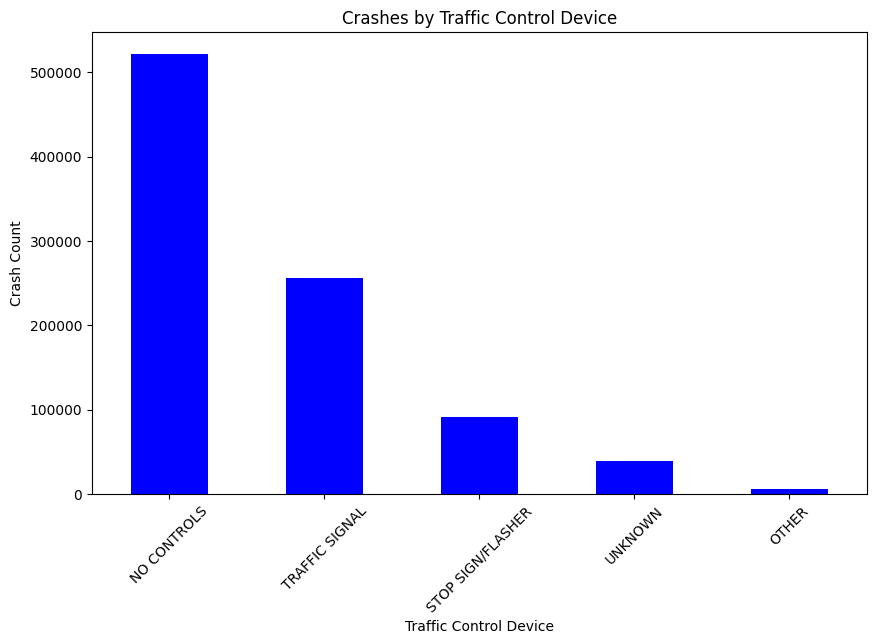

In [46]:
# Count of crashes by traffic control device
df['TRAFFIC_CONTROL_DEVICE'].value_counts().head(5).plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Crashes by Traffic Control Device')
plt.xlabel('Traffic Control Device')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()


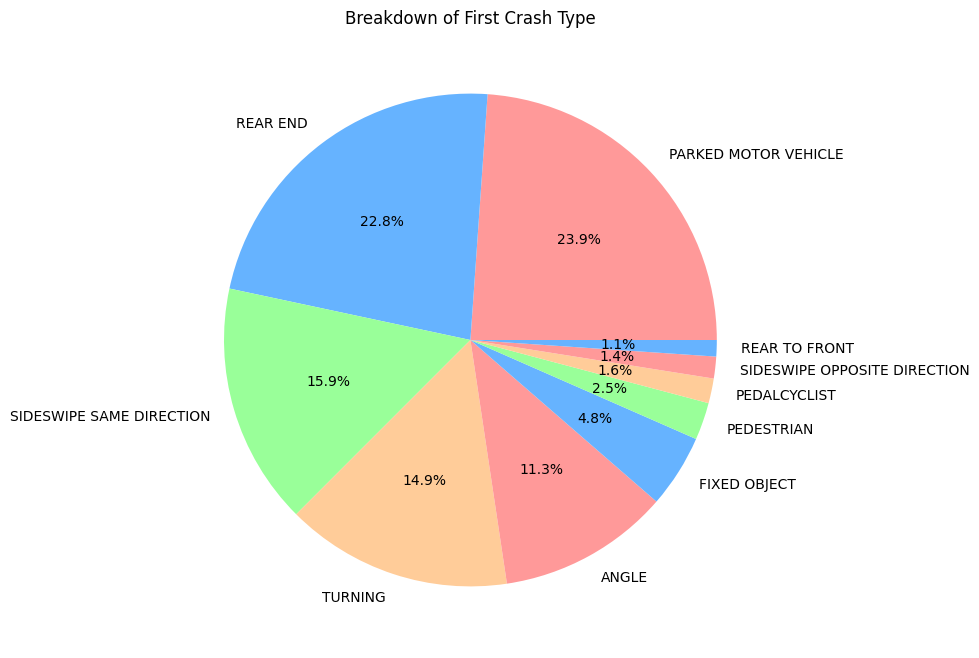

In [49]:
# Pie chart of first crash types
df['FIRST_CRASH_TYPE'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Breakdown of First Crash Type')
plt.ylabel('')  # Hide the y-label
plt.show()


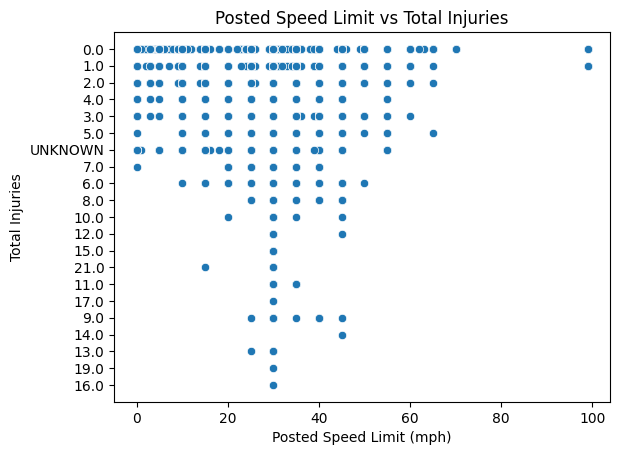

In [30]:

# Relationship between speed limit and total injuries
sns.scatterplot(x='POSTED_SPEED_LIMIT', y='INJURIES_TOTAL', data=df)
plt.title('Posted Speed Limit vs Total Injuries')
plt.xlabel('Posted Speed Limit (mph)')
plt.ylabel('Total Injuries')
plt.show()


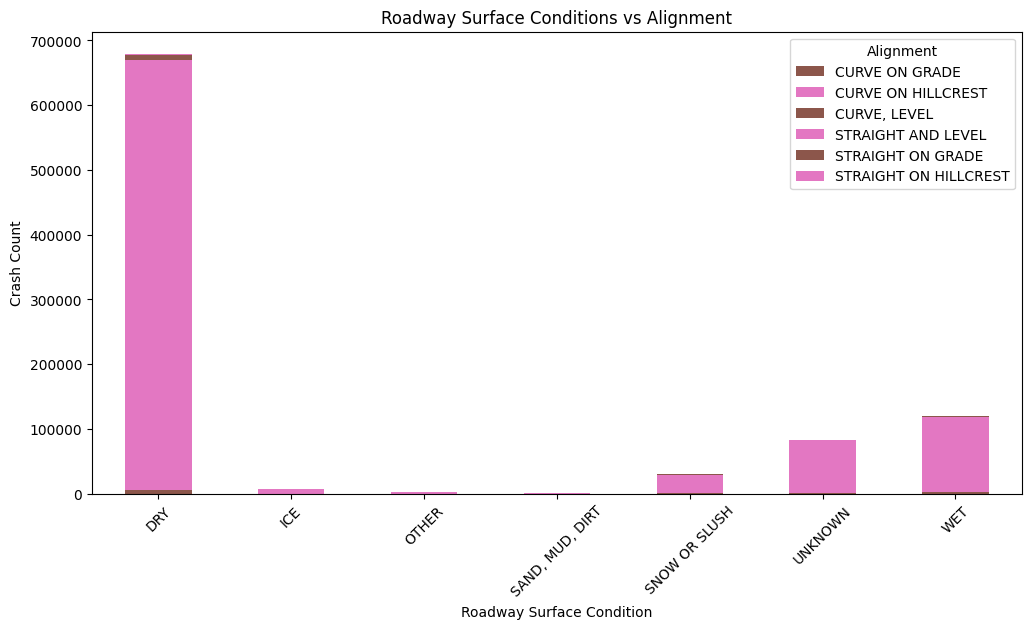

In [51]:
# Grouped by Roadway Surface Condition and Alignment
road_alignment = df.groupby(['ROADWAY_SURFACE_COND', 'ALIGNMENT']).size().unstack(fill_value=0)
road_alignment.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#8c564b', '#e377c2'])
plt.title('Roadway Surface Conditions vs Alignment')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Crash Count')
plt.legend(title='Alignment')
plt.xticks(rotation=45)
plt.show()


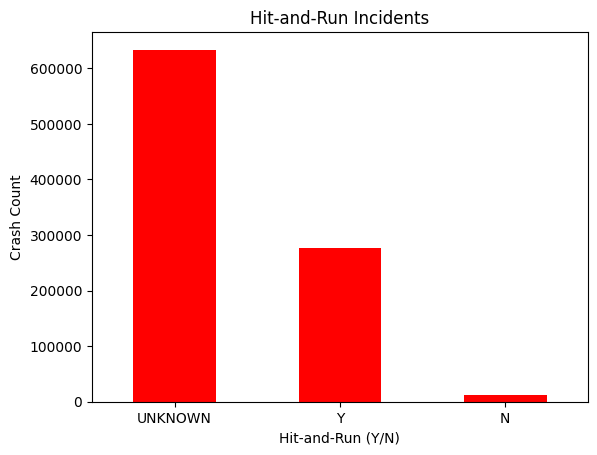

In [52]:
# Count of hit-and-run incidents
df['HIT_AND_RUN_I'].value_counts().plot(kind='bar', color='red')
plt.title('Hit-and-Run Incidents')
plt.xlabel('Hit-and-Run (Y/N)')
plt.ylabel('Crash Count')
plt.xticks(rotation=0)
plt.show()


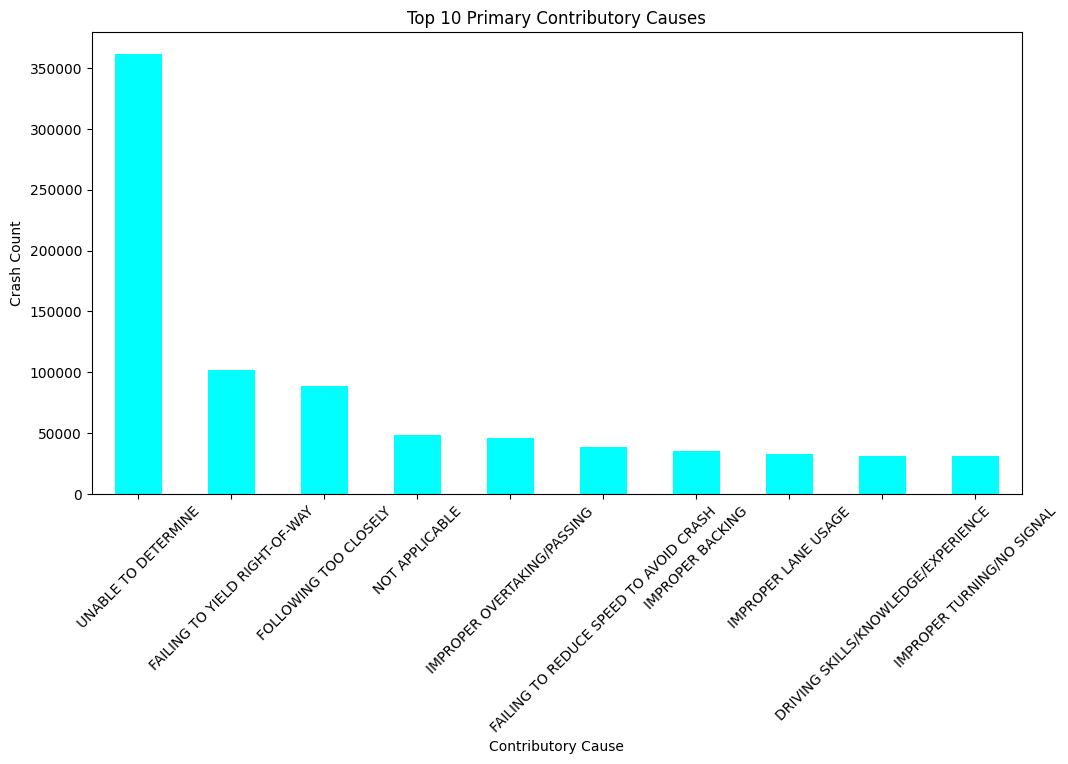

In [33]:
# Most common primary contributory causes
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10).plot(kind='bar', color='cyan', figsize=(12, 6))
plt.title('Top 10 Primary Contributory Causes')
plt.xlabel('Contributory Cause')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()


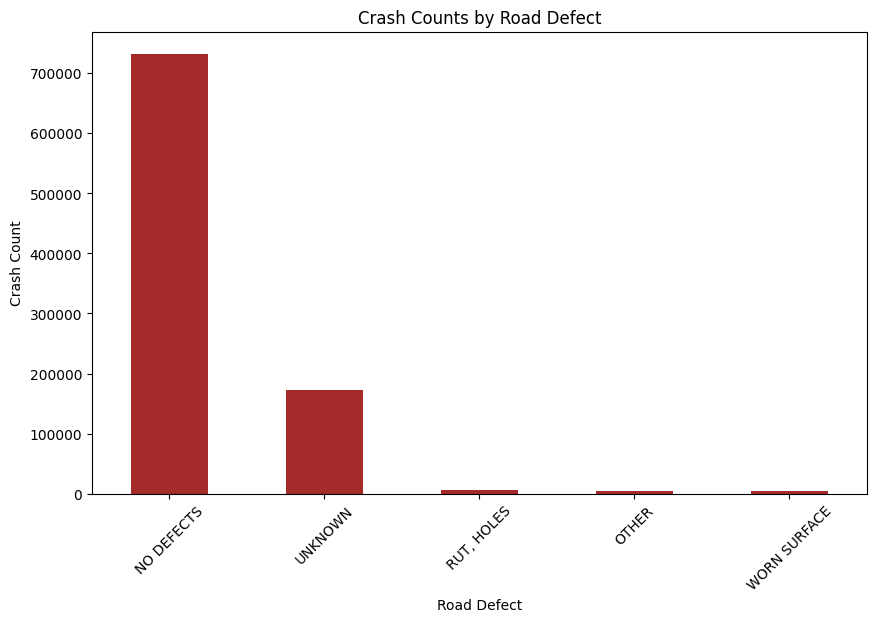

In [53]:
df['ROAD_DEFECT'].value_counts().head(5).plot(kind='bar', color='brown', figsize=(10, 6))
plt.title('Crash Counts by Road Defect')
plt.xlabel('Road Defect')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\asd\AppData\Local\Temp\ipykernel_6216\2046934927.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_severity = df.groupby(['CRASH_MONTH', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)


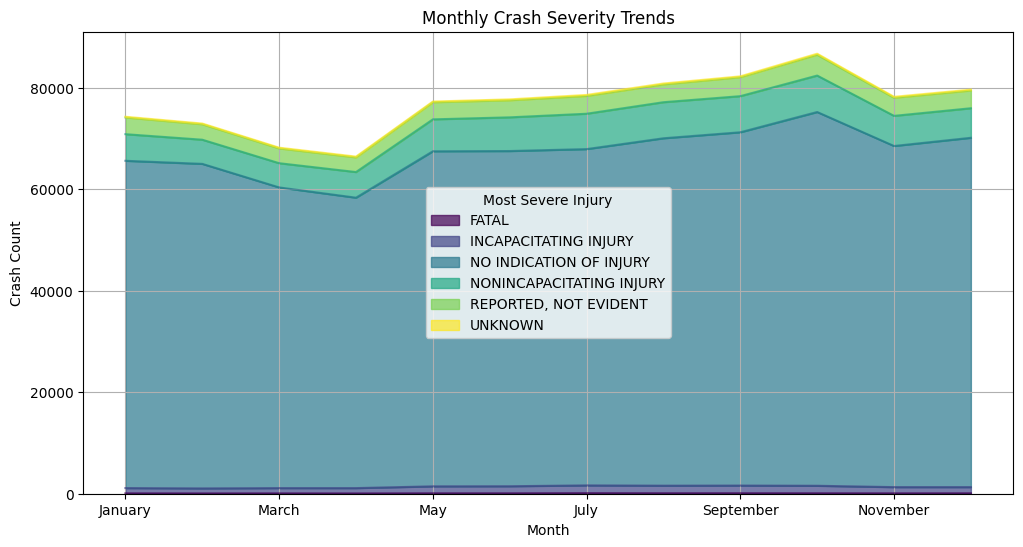

In [43]:
monthly_severity = df.groupby(['CRASH_MONTH', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)
monthly_severity.plot(kind='area', figsize=(12, 6), alpha=0.7, colormap='viridis')
plt.title('Monthly Crash Severity Trends')
plt.xlabel('Month')
plt.ylabel('Crash Count')
plt.legend(title='Most Severe Injury')
plt.grid()
plt.show()


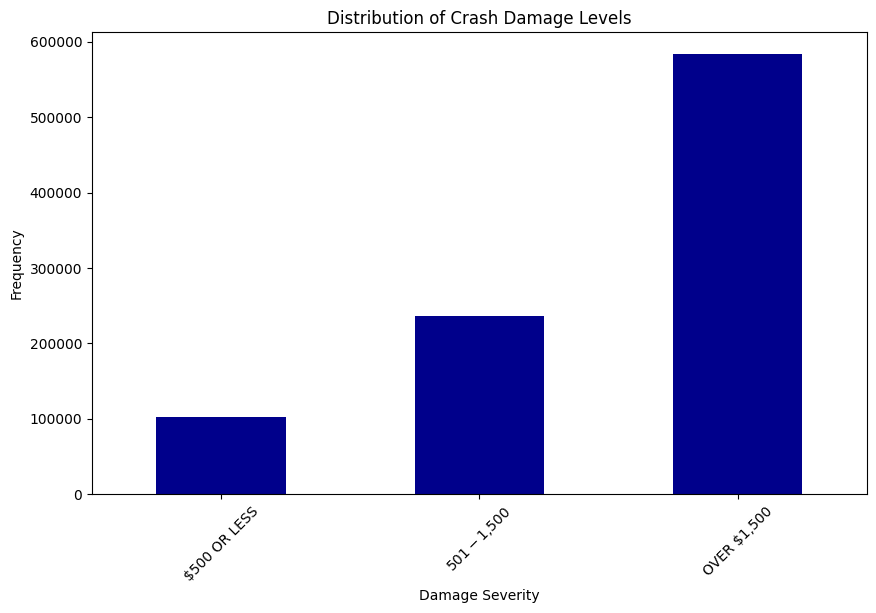

In [44]:
df['DAMAGE'].value_counts().sort_index().plot(kind='bar', color='darkblue', figsize=(10, 6))
plt.title('Distribution of Crash Damage Levels')
plt.xlabel('Damage Severity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
